In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
num_cpu = 8
idle_times={}
for i in range(num_cpu):
    idle_times[i]=[]
utilFile = "output/util.txt"
operationsFile = "output/operations.txt"
benchmarkFile = "output/benchmark.txt"
with open(utilFile) as f:
    utilBigList = f.read().split("@")[1:]


for utilSingle in utilBigList:
    idle_times_temp = {}
    for i in range(num_cpu):
        idle_times_temp[i]=[]
    stringNewLine = utilSingle.split('\n')[2:]
    for stringLine in stringNewLine:        
        words = stringLine.split()
        if(len(words)>=2 and words[2].isdigit()):
            if(words[0] is "Average:"):
                print("Average")
                continue
            CPU = int(words[2])
            idle = float(words[-1].rstrip('\x00'))
#             print(CPU)
#             print(idle)
            idle_times_temp[CPU].append(idle)
    for i in range(num_cpu):
        idle_times[i].append(idle_times_temp[i])
idle_times_avg = {}
for i in range(num_cpu):
    idle_times_avg[i]=[]
    for times in idle_times[i]:
        idle_times_avg[i].append(np.mean(times))
#print(idle_times_avg)

with open(operationsFile) as f:                                                                                                                                                                                     
    operationsStr = f.read().split('\n')[:-1]
operations = np.array(map(int, operationsStr))
        
        
    

In [55]:
print(operations)

[10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000
 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000
 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000
 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000
 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000
 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000
 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000
 94000 95000]


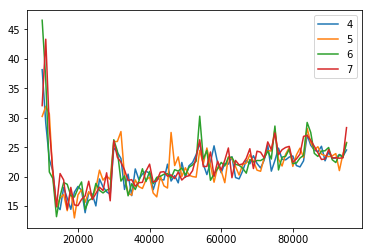

In [56]:
plt.figure(1)
for i in range(num_cpu):
    if(i<4 or i>7):
        continue
    plt.plot(operations,100-np.array(idle_times_avg[i]),label=i)
plt.legend()
plt.show()